In [30]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import re
import scipy
import itertools
import pickle
import os.path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF as sm_ECDF
import statsmodels.formula.api as smf
from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM
import concurrent.futures
import attila_utils
import gem_tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ar = gem_tools.read_active_reactions(groupdict={'m-control': ('all_control', 'MSBB'), 'm-AD-B2': ('SubtypeB2_AD', 'MSBB')})

In [3]:
gemsubsys = gem_tools.read_gem_excel()['SUBSYSTEM']
gemsubsys

ID
MAR03905       Glycolysis / Gluconeogenesis
MAR03907       Glycolysis / Gluconeogenesis
MAR04097       Glycolysis / Gluconeogenesis
MAR04099       Glycolysis / Gluconeogenesis
MAR04108       Glycolysis / Gluconeogenesis
                         ...               
MAR10129             Bile acid biosynthesis
MAR10130             Bile acid biosynthesis
MAR10131             Bile acid biosynthesis
MAR10132          Exchange/demand reactions
MAR13083    Metabolism of other amino acids
Name: SUBSYSTEM, Length: 13069, dtype: object

['named-figure/n-reactions-ecdf.png', 'named-figure/n-reactions-ecdf.pdf']

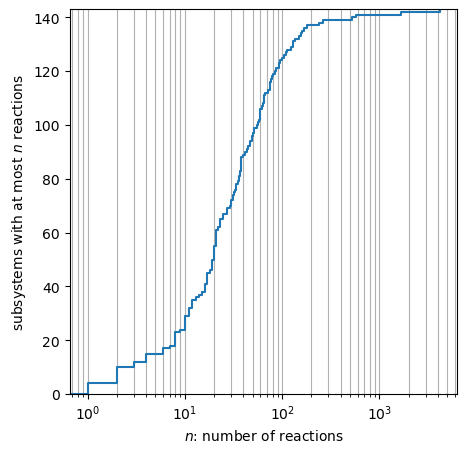

In [4]:
df = gemsubsys.value_counts(sort=True, ascending=True).to_frame('counts')
xs = np.logspace(0, df.max(), num=200)
ys = sm_ECDF(gemsubsys.value_counts(sort=True, ascending=True))(xs)
fig, ax = plt.subplots(figsize=(5,5))
sns.ecdfplot(df, x='counts', stat='count', ax=ax)
ax.set_xlabel(r'$n$: number of reactions')
ax.set_ylabel(r'subsystems with at most $n$ reactions')
ax.set_xscale('log')
ax.grid(axis='x', which='both')
attila_utils.savefig(fig, 'n-reactions-ecdf')

['named-figure/subsystem-rxn-counts.png',
 'named-figure/subsystem-rxn-counts.pdf']

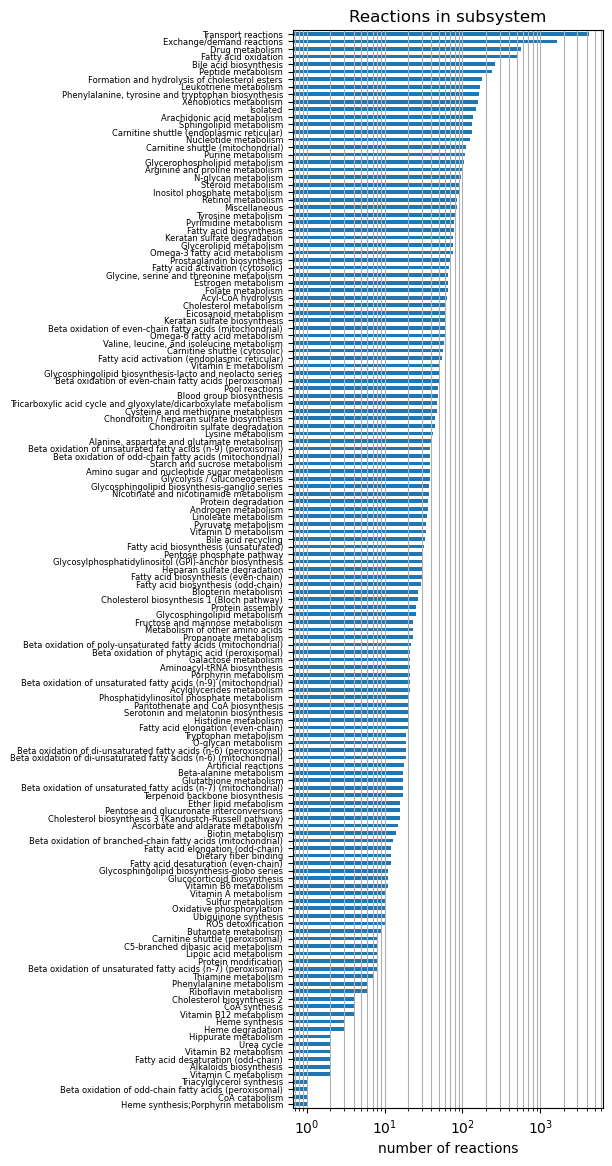

In [5]:
def subsystem_rxn_count(gemsubsys=gemsubsys, topk=None):
    fig, ax = plt.subplots(figsize=(4, 14 if topk is None else 5))
    s = gemsubsys.value_counts(sort=True, ascending=True)
    s = s if topk is None else s.iloc[-topk:]
    s.plot(kind='barh')
    ax.set_xscale('log')
    ax.set_xlabel(r'number of reactions')
    ax.grid(axis='x', which='both')
    ax.tick_params(axis='y', labelsize=6 if topk is None else 8)
    ax.set_title('Reactions in subsystem')
    return((fig, ax))

fig, ax = subsystem_rxn_count()
attila_utils.savefig(fig, 'subsystem-rxn-counts')

['named-figure/subsystem-rxn-counts-top30.png',
 'named-figure/subsystem-rxn-counts-top30.pdf']

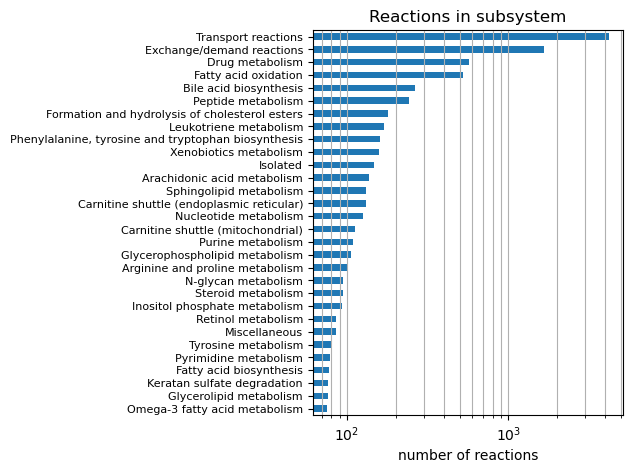

In [6]:
fig, ax = subsystem_rxn_count(topk=30)
attila_utils.savefig(fig, 'subsystem-rxn-counts-top30')

## Heatmaps
### Sphingolipids

['named-figure/Sphingolipid-metabolism.png',
 'named-figure/Sphingolipid-metabolism.pdf']

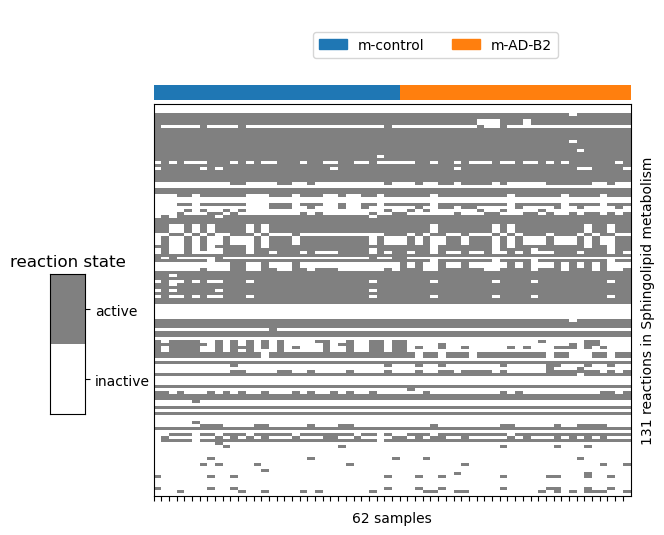

In [7]:
g = gem_tools.ar_clustermap(['Sphingolipid metabolism'], ar=ar, col_cluster=False)
attila_utils.savefig(g, 'Sphingolipid-metabolism')

In [8]:
pathways = pd.read_csv('../../resources/tunahan/Busra-2023-02-05/subsystem-pathway.csv')
pathways = pathways.groupby('pathway')['subsystem'].apply(lambda x: x.to_numpy())
pathways

pathway
Bile acid metabolism                             [Bile acid biosynthesis, Bile acid recycling]
Carnitine shuttle                            [Carnitine shuttle (cytosolic), Carnitine shut...
Cholesterol metabolism                       [Cholesterol biosynthesis 1 (Bloch pathway), C...
Fatty acid metabolism                        [Fatty acid activation (cytosolic), Fatty acid...
Glycerolipid metabolism                      [Glycerophospholipid metabolism, Glycerolipid ...
Glycosphingolipid metabolism                 [Glycosphingolipid biosynthesis-ganglio series...
Phosphatidylinositol phosphate metabolism    [Glycosylphosphatidylinositol (GPI)-anchor bio...
Name: subsystem, dtype: object

### Fatty acids

In [9]:
fatty_acid_pathway = pathways.loc['Fatty acid metabolism']
fatty_acid_pathway

array(['Fatty acid activation (cytosolic)',
       'Fatty acid activation (endoplasmic reticular)',
       'Fatty acid biosynthesis (even-chain)',
       'Fatty acid biosynthesis (odd-chain)',
       'Fatty acid biosynthesis (unsaturated)',
       'Fatty acid elongation (even-chain)',
       'Fatty acid elongation (odd-chain)',
       'Fatty acid desaturation (even-chain)',
       'Fatty acid desaturation (odd-chain)', 'Fatty acid biosynthesis',
       'Beta oxidation of even-chain fatty acids (peroxisomal)',
       'Beta oxidation of odd-chain fatty acids (peroxisomal)',
       'Beta oxidation of unsaturated fatty acids (n-9) (peroxisomal)',
       'Beta oxidation of phytanic acid (peroxisomal)',
       'Beta oxidation of di-unsaturated fatty acids (n-6) (peroxisomal)',
       'Beta oxidation of even-chain fatty acids (mitochondrial)',
       'Beta oxidation of odd-chain fatty acids (mitochondrial)',
       'Beta oxidation of unsaturated fatty acids (n-7) (mitochondrial)',
       'Bet

['named-figure/Fatty-acid-metabolism.png',
 'named-figure/Fatty-acid-metabolism.pdf']

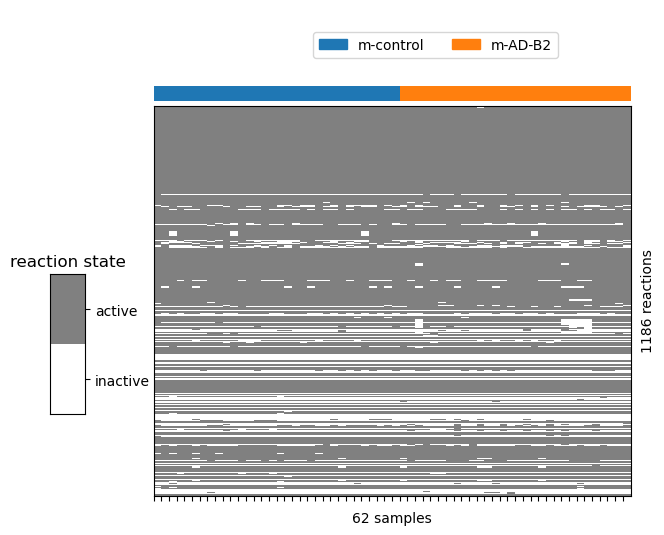

In [10]:
g = gem_tools.ar_clustermap(fatty_acid_pathway, ar=ar)
attila_utils.savefig(g, 'Fatty-acid-metabolism')

In [11]:
def subsys2fname(subsys):
    fname = re.sub('[ ()]+', '-', subsys).strip('-')
    return(fname)

subsys2fname('Beta oxidation of unsaturated fatty acids (n-7) (mitochondrial)')

'Beta-oxidation-of-unsaturated-fatty-acids-n-7-mitochondrial'

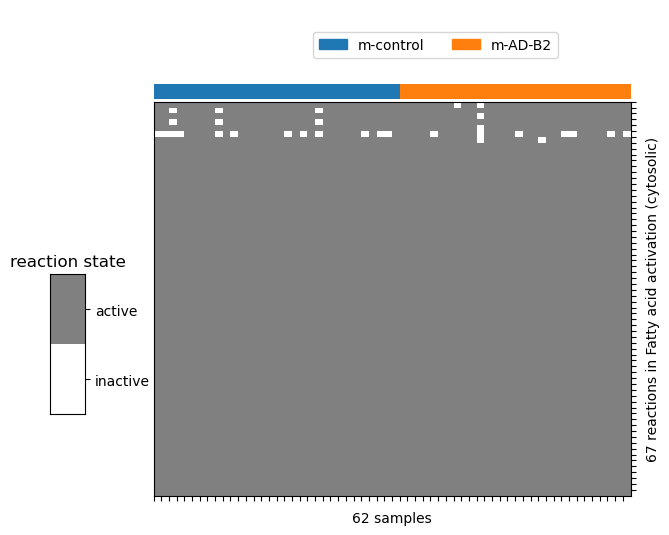

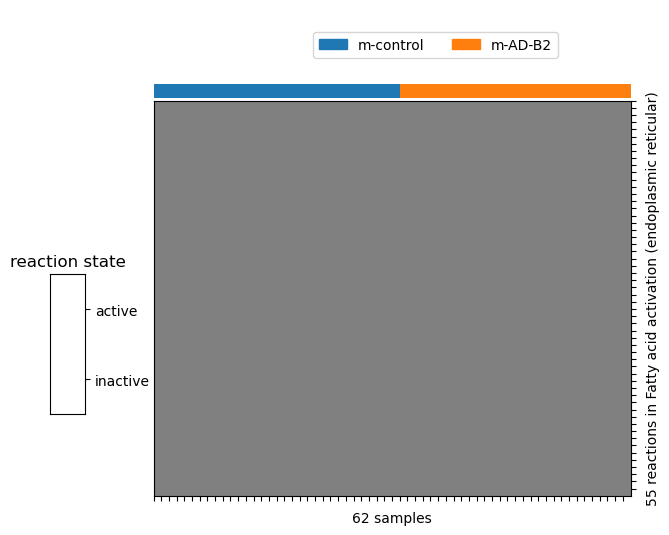

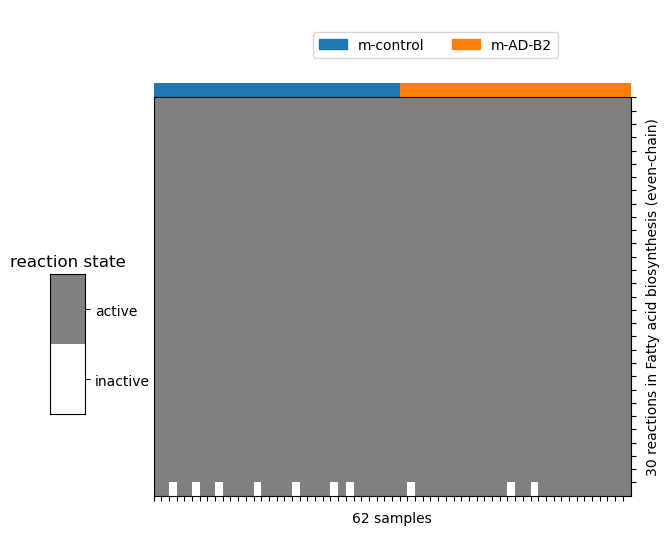

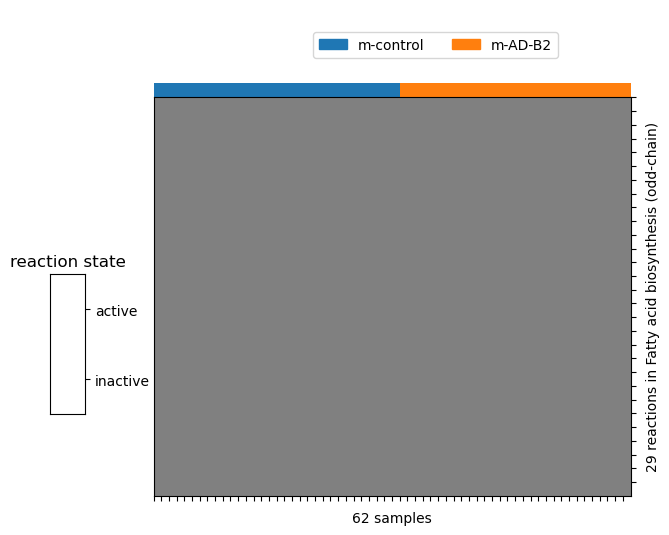

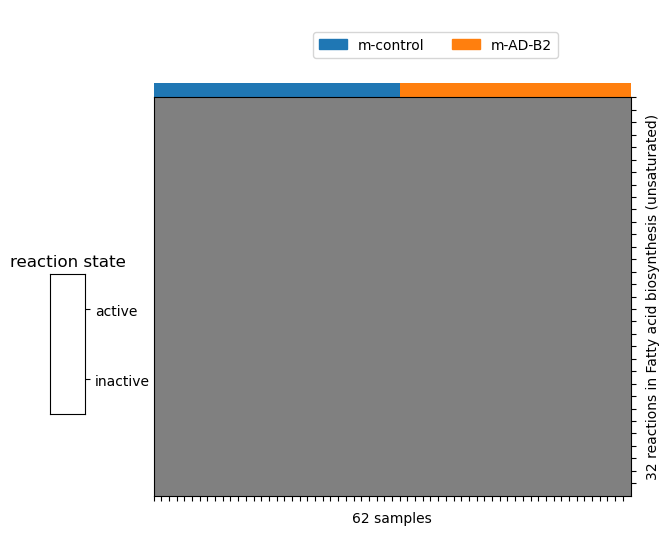

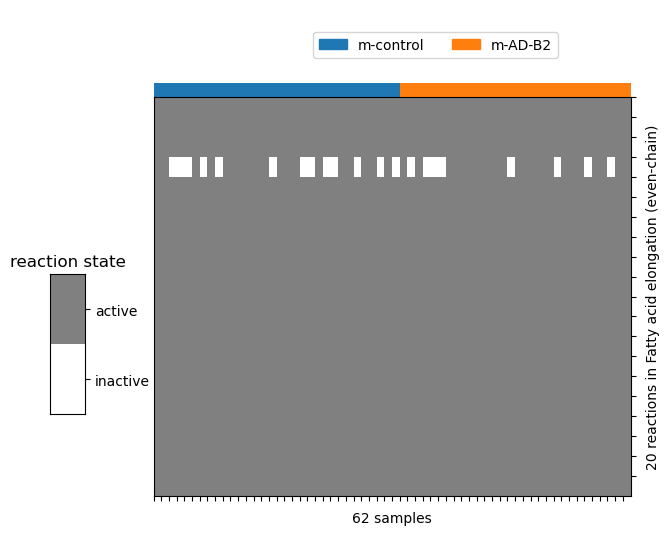

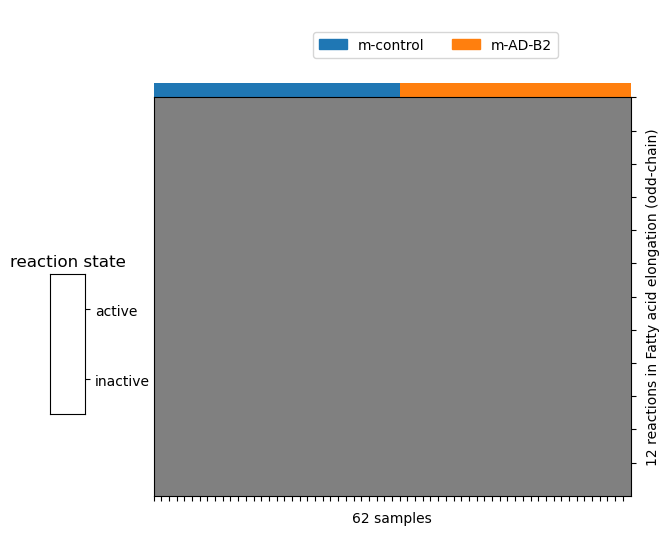

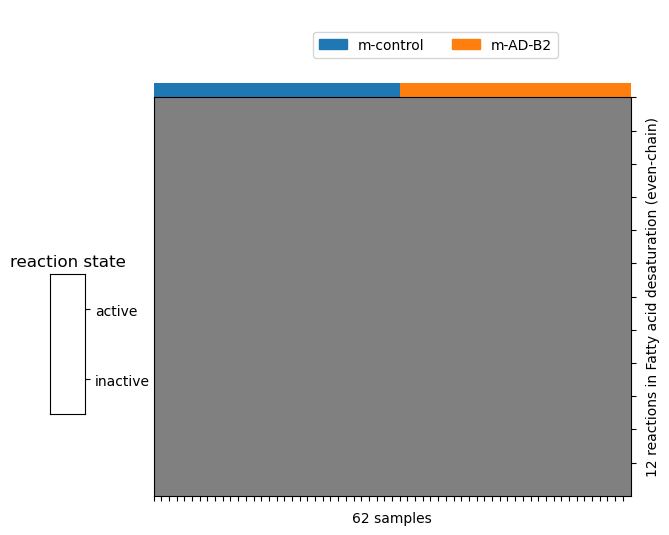

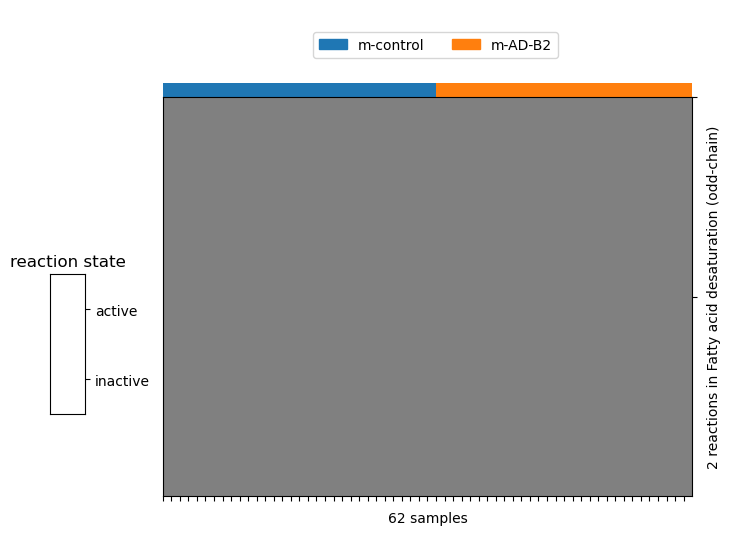

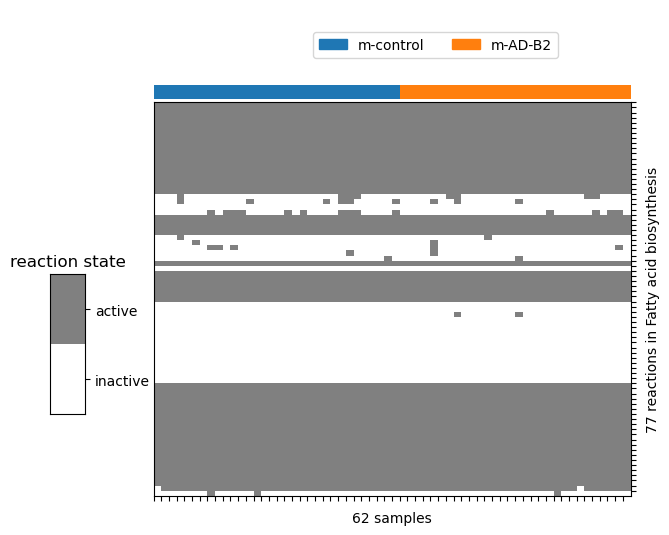

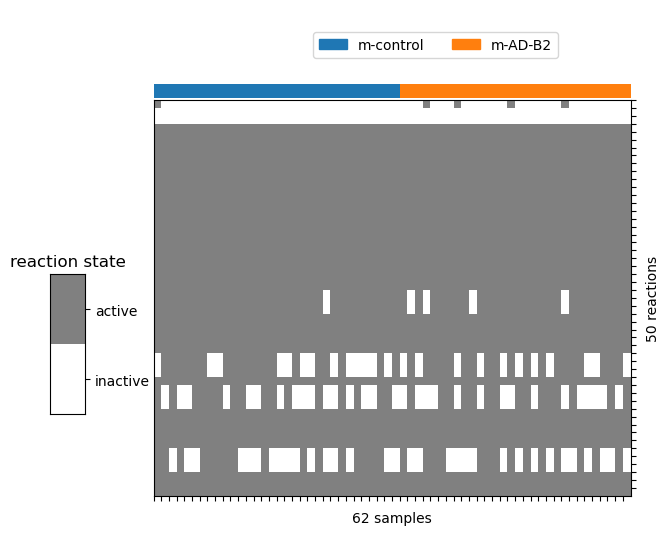

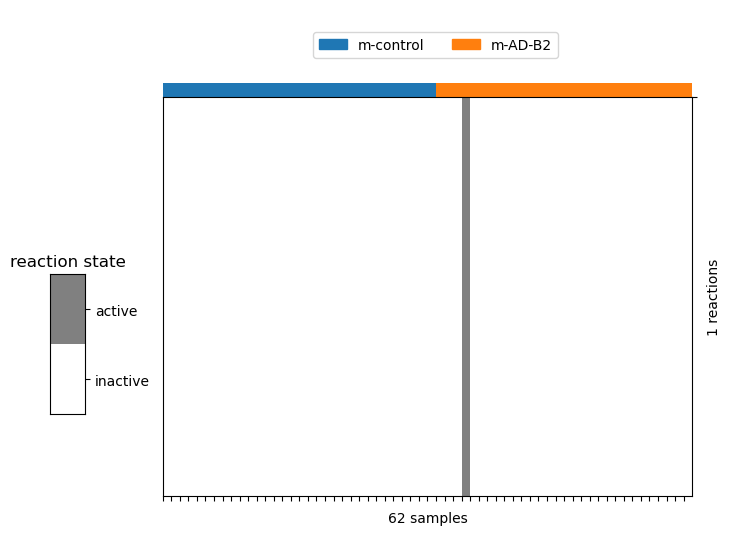

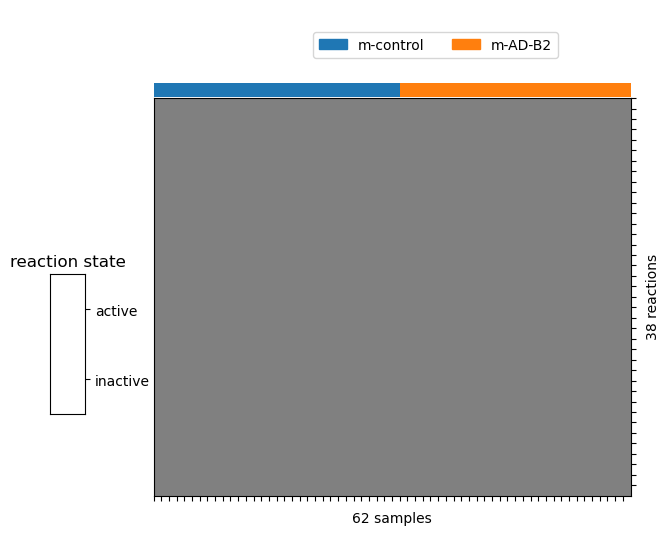

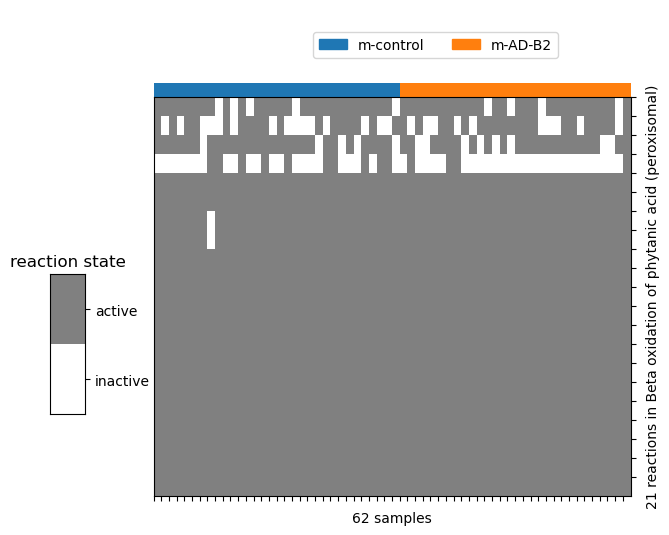

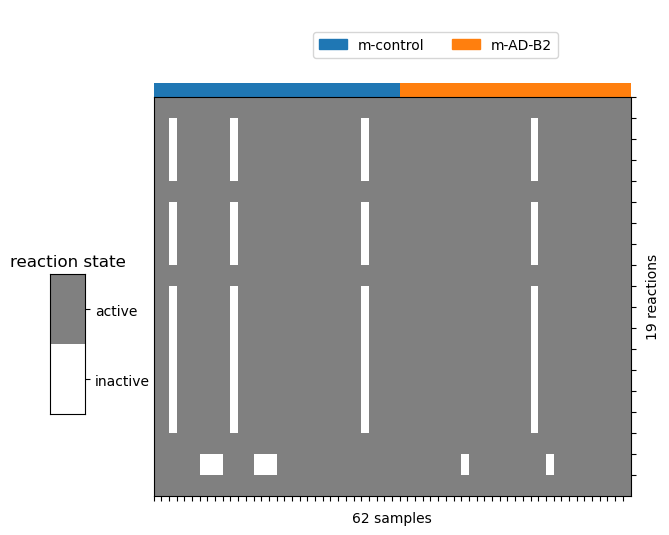

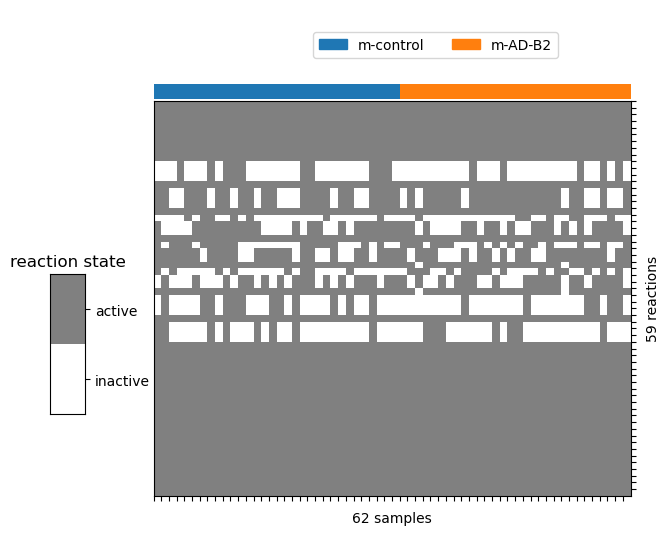

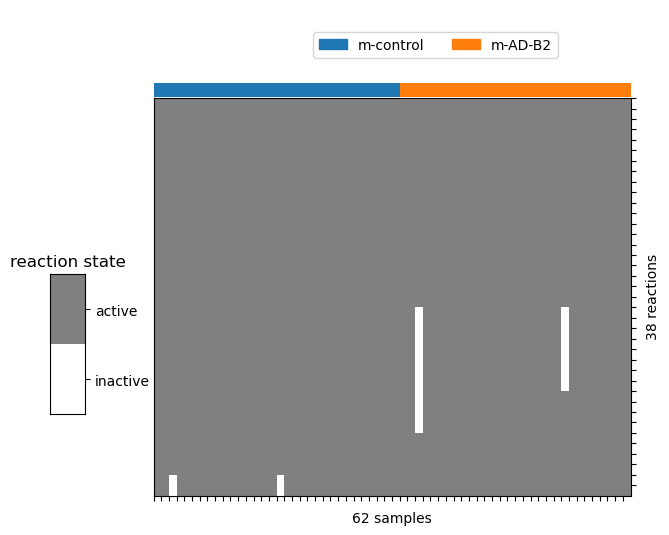

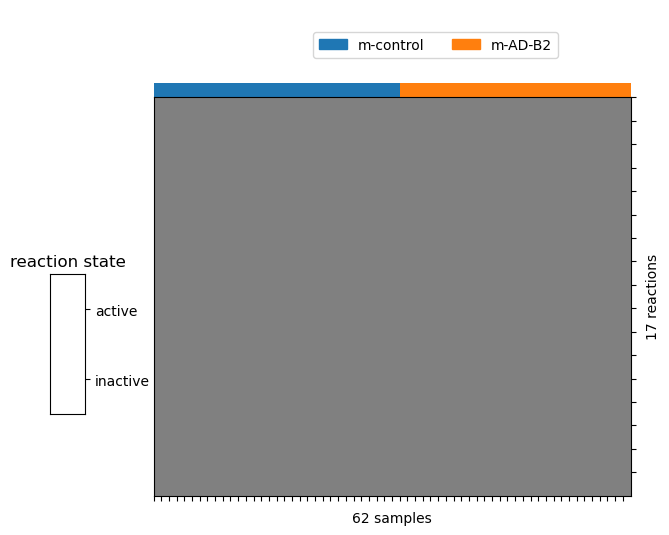

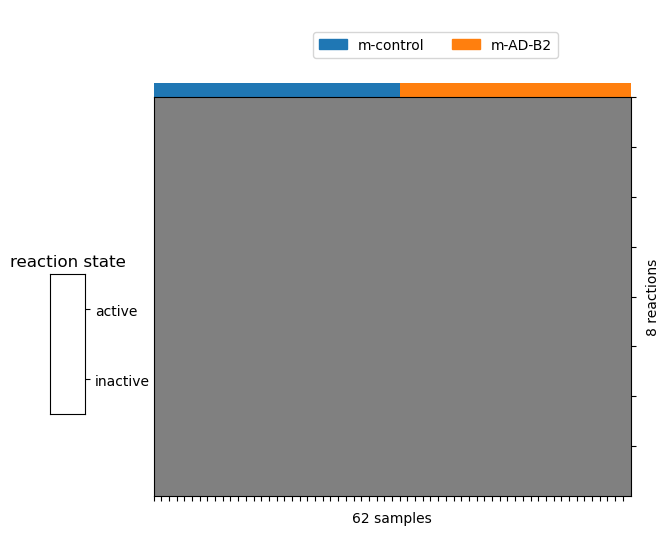

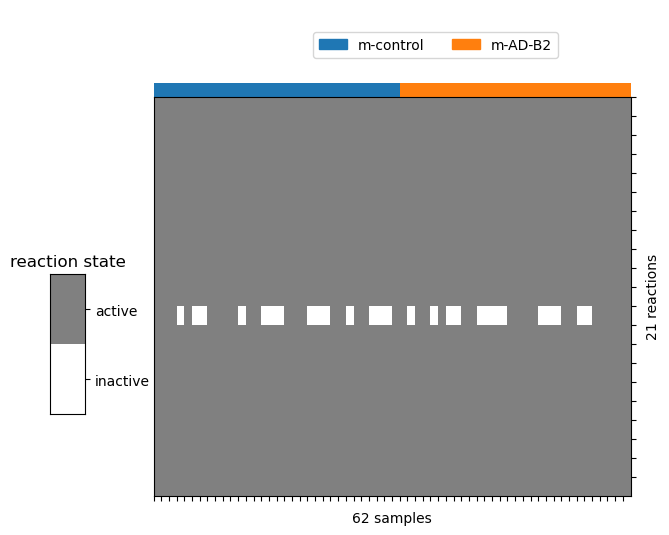

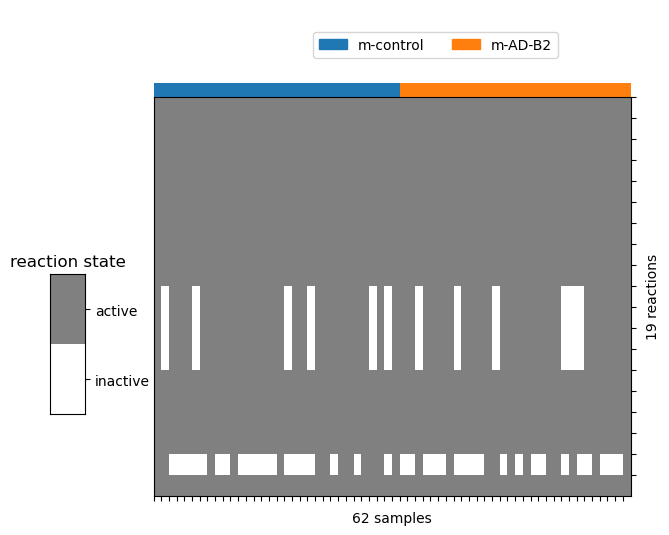

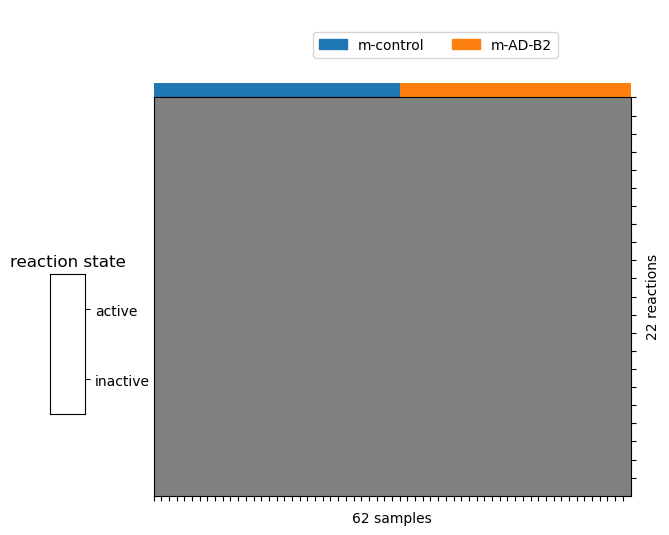

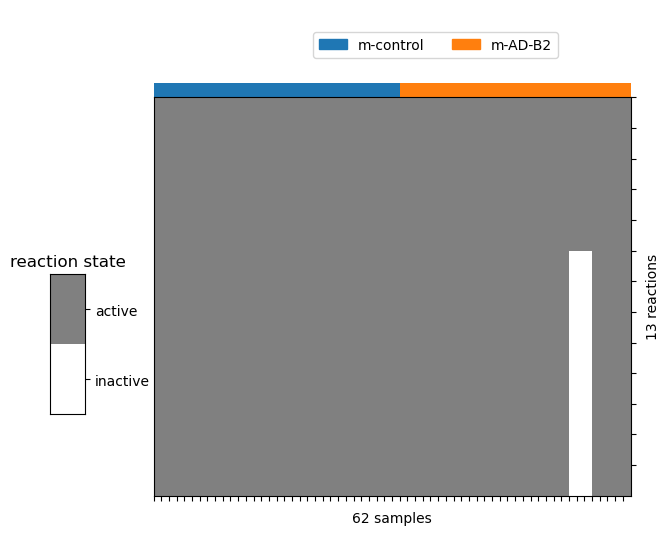

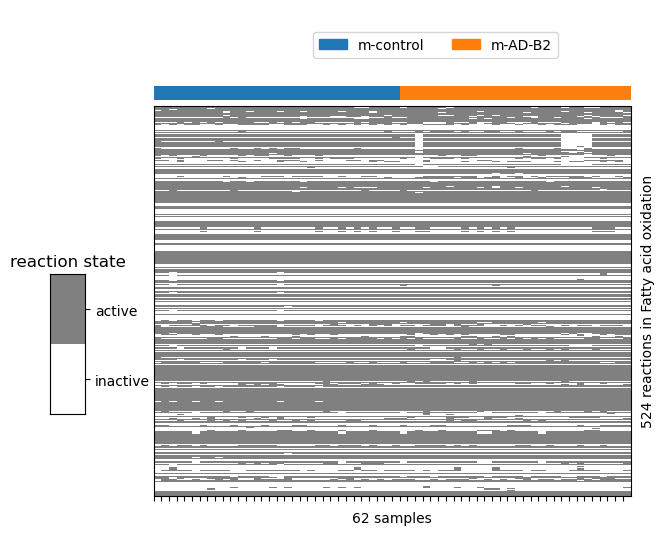

In [12]:
for subsys in fatty_acid_pathway:
    g = gem_tools.ar_clustermap([subsys], ar=ar)
    attila_utils.savefig(g, subsys2fname(subsys))
    del g

### Carnitine pathway

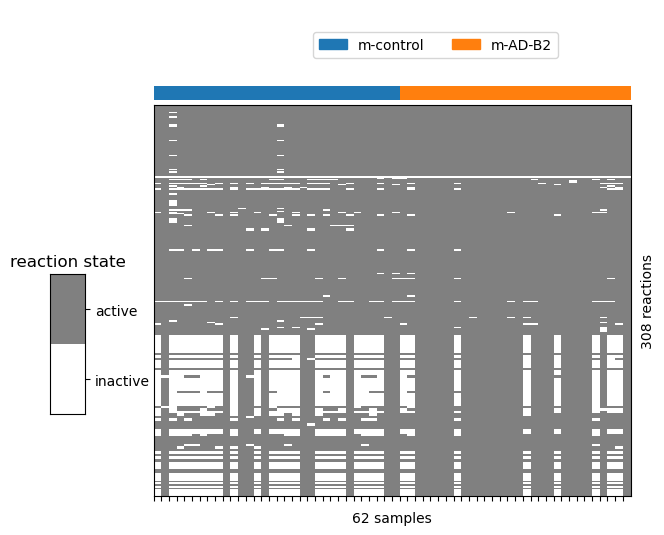

In [13]:
carnitine_pathway = pathways.loc['Carnitine shuttle']
g = gem_tools.ar_clustermap(carnitine_pathway, ar=ar)
attila_utils.savefig(g, 'Carnitine-metabolism')
del g

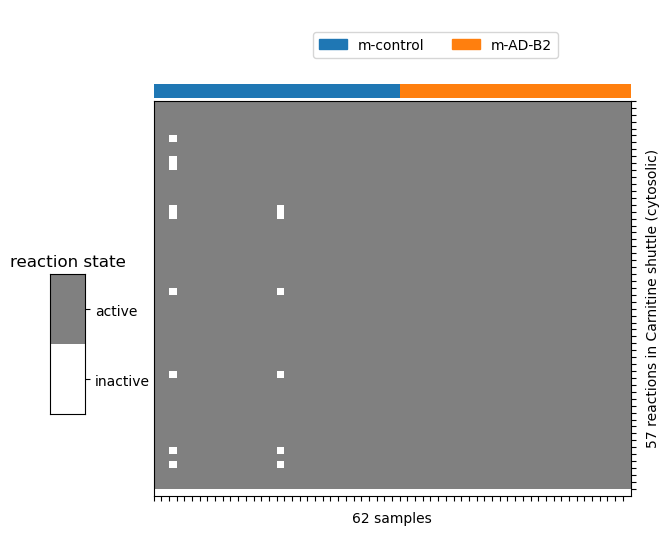

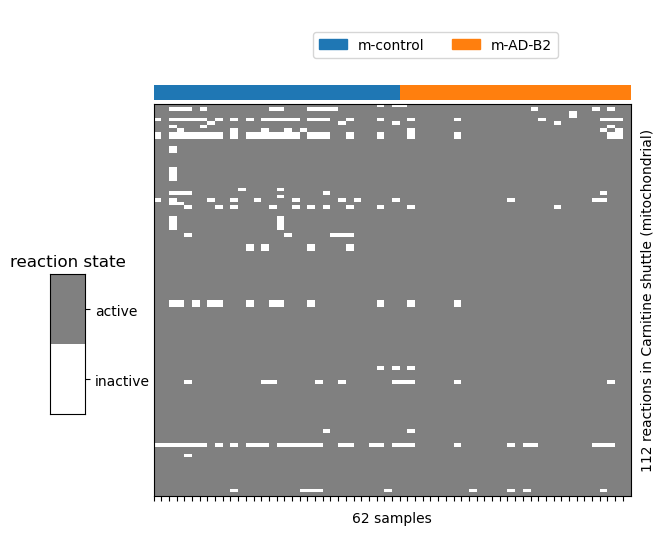

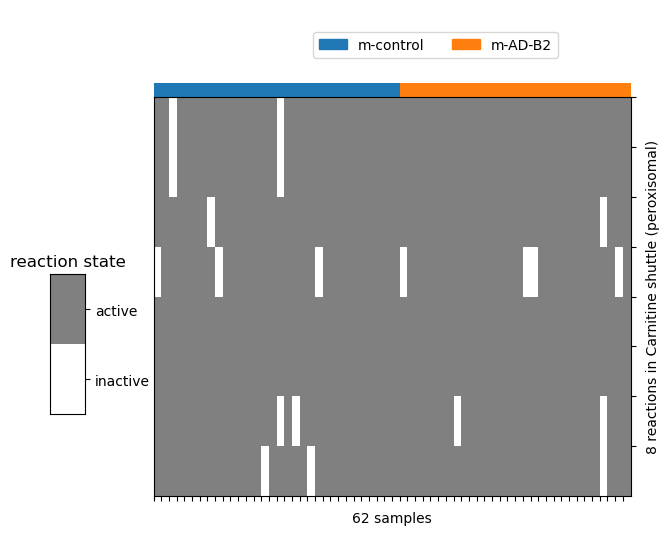

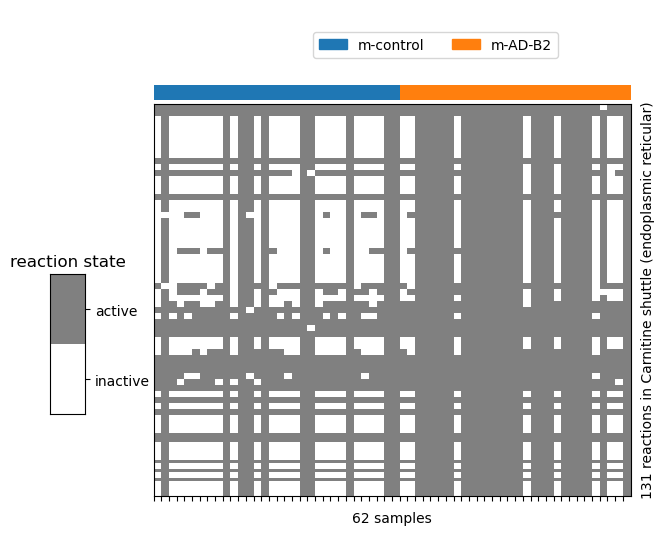

In [14]:
for subsys in carnitine_pathway:
    g = gem_tools.ar_clustermap([subsys], ar=ar)
    attila_utils.savefig(g, subsys2fname(subsys))
    del g

## Bayesian mixed effects logistic regression

### Model formulation

Let $x=1$ encode an AD `disease_state`, and $x=0$ encode control.

The [inline documentation of the statsmodels.genmod.bayes_mixed_glm module](https://www.statsmodels.org/stable/_modules/statsmodels/genmod/bayes_mixed_glm.html) reveals that

* the error distribution $Y$ given the linear predictor $\eta$ is Bernoulli $Y \sim \mathrm{Binom}(n=1, p)$
* link function $g(\mu) = \mathrm{E}_b(\eta) = x\beta + Zb$ is logit:
\begin{equation}
\mathrm{E}_b(\eta) = \mathrm{E}_b(x\beta + Zb) = x\beta = \mathrm{logit}(\pi) = \mathrm{log}(\pi / (1 - \pi))
\end{equation}
    * The first equation follows from $\mathrm{E}_b(b) = 0$ since $b \sim N(0, G)$, i.e $b$ is normally distributed with mean 0
    * The second equation follows from $x\beta = \eta = g(\mu)$, where the link function $g = \mathrm{logit}$ and from $\mathrm{E}(Y \, |\, \eta) = \mu = \pi$, where $\pi$ is the expected proportion of active reactions ($Y=1$)
    * The last expression $\mathrm{log}(\pi / (1 - \pi))$ is the posterior log odds

Therefore
\begin{eqnarray}
x\beta &=& \mathrm{log} \frac{\pi(x)}{1 - \pi(x)} \\
\beta &=& \mathrm{log} \frac{\pi(x=1)}{1 - \pi(x=1)} \; \Leftrightarrow \; e^\beta = \frac{\pi(x=1)}{1 - \pi(x=1)}
\end{eqnarray}
which means that we can interpret $\beta$ as the posterior log odds ratio of reaction state for AD w.r.t control.  (Note that if $x=0 \Rightarrow 0\beta = 0 = \mathrm{log}(\pi(x=0) / (1 - \pi(x=0)))$, so that the second equation above follows from the first one.)


### Fitting

In [15]:
def reshape2long(df, disease_state):
    long = df.stack().to_frame('rxn_state')
    long['rxn_state'] = np.int8(long.rxn_state)
    long['disease_state'] = disease_state
    long['rxn_ID'] = long.index.get_level_values(0)
    long['subject_ID'] = long.index.get_level_values(1)
    return(long)

def long_ar_subsys(subsystems, ar=ar, gemsubsys=gemsubsys):
    l = [reshape2long(ar[k].loc[gemsubsys.loc[gemsubsys.isin(subsystems)].index], k) for k in ar.keys()]
    long = pd.concat(l, axis=0)
    return(long)

def myBinomialBayesMixedGLM(subsys, control_group='m-control', AD_group='m-AD-B2', vcp_p=0.2, fe_p=2, fit_method='fit_vb', ar=ar, gemsubsys=gemsubsys):
    #print('Subsystem(s): ' + ', '.join(subsys))
    data = long_ar_subsys(subsys, ar=ar, gemsubsys=gemsubsys)
    if data.rxn_state.std() == 0:
        return(None)
    random = {'Reactions': 'rxn_ID', 'Subjects': 'subject_ID'}
    formula = 'rxn_state ~ C(disease_state, levels=["' + control_group + '", "' + AD_group + '"])'
    md = BinomialBayesMixedGLM.from_formula(formula, random, data, vcp_p=vcp_p, fe_p=fe_p)
    fit = getattr(md, fit_method)
    res = fit()
    return(res)

def print_results(subsys, vcp_p=0.2, fe_p=2):
    print('Subsystem(s): ' + ', '.join(subsys))
    for fit_method_name, fit_method in zip(['variational Bayes', 'Laplace approximation'], ['fit_vb', 'fit_map']):
        res = myBinomialBayesMixedGLM(subsys, vcp_p=vcp_p, fe_p=fe_p, fit_method=fit_method)
        print('\n' * 2, 'Fit method: ' + fit_method_name, '\n', res.summary())
    return(None)

In [16]:
print_results(['Carnitine shuttle (endoplasmic reticular)'])

Subsystem(s): Carnitine shuttle (endoplasmic reticular)


 Fit method: variational Bayes 
                                         Binomial Mixed GLM Results
                                                             Type Post. Mean Post. SD   SD  SD (LB) SD (UB)
-----------------------------------------------------------------------------------------------------------
Intercept                                                       M     0.0420   0.0738                      
C(disease_state, levels=["m-control", "m-AD-B2"])[T.m-AD-B2]    M     8.8931   0.1421                      
Reactions                                                       V     1.5179   0.0525 4.563   4.108   5.068
Subjects                                                        V     1.6684   0.0656 5.304   4.652   6.047
Parameter types are mean structure (M) and variance structure (V)
Variance parameters are modeled as log standard deviations


 Fit method: Laplace approximation 
                               

In [17]:
print_results(['Sphingolipid metabolism'])

Subsystem(s): Sphingolipid metabolism


 Fit method: variational Bayes 
                                         Binomial Mixed GLM Results
                                                             Type Post. Mean Post. SD   SD  SD (LB) SD (UB)
-----------------------------------------------------------------------------------------------------------
Intercept                                                       M    -0.2209   0.0446                      
C(disease_state, levels=["m-control", "m-AD-B2"])[T.m-AD-B2]    M     0.1362   0.0641                      
Reactions                                                       V     1.7017   0.0518 5.483   4.943   6.083
Subjects                                                        V    -0.4121   0.0883 0.662   0.555   0.790
Parameter types are mean structure (M) and variance structure (V)
Variance parameters are modeled as log standard deviations


 Fit method: Laplace approximation 
                                         Binomial

In [18]:
fpath = '../../results/2023-02-10-gem-subsystems/fitted_models.pickle'
if os.path.exists(fpath):
    print('exists')
    with open(fpath, 'rb') as f:
        fitted_models = pickle.load(f)
else:
    subsystems = gemsubsys.unique()
    d = {subsys: myBinomialBayesMixedGLM([subsys], 'm-control', 'm-AD-B2', vcp_p=0.2, fe_p=2, fit_method='fit_map') for subsys in subsystems}
    fitted_models = {'m-AD-B2 wrt m-control': pd.Series(d)}
    with open(fpath, 'wb') as f:
        pickle.dump(fitted_models, f)

fittedm = fitted_models['m-AD-B2 wrt m-control']

exists


### Bayes factors

['named-figure/cov_params.png', 'named-figure/cov_params.pdf']

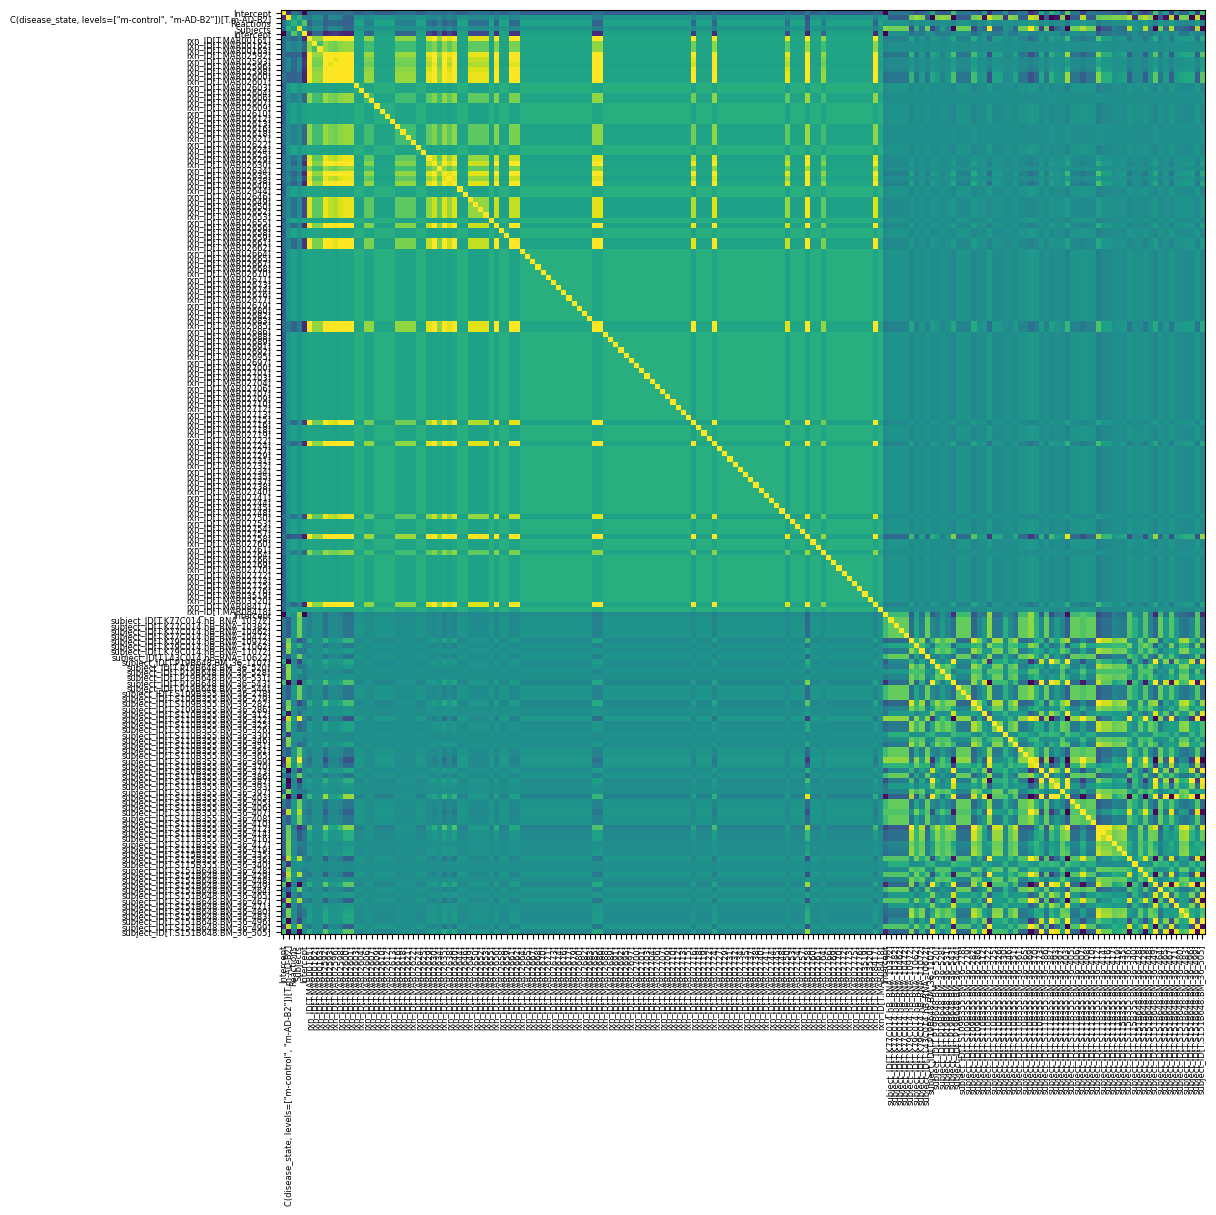

In [19]:
m = fittedm.loc['Carnitine shuttle (mitochondrial)']
fig, ax = plt.subplots(figsize=(12, 12))
corrmat = m.cov_params()
ax.imshow(corrmat, vmin=-0.025, vmax=0.025)
ax.set_xticks(range(corrmat.shape[0]))
ax.set_yticks(range(corrmat.shape[0]))
ax.set_xticklabels(m.model.names, fontsize=6, rotation=90)
ax.set_yticklabels(m.model.names, fontsize=6)
attila_utils.savefig(fig, 'cov_params')

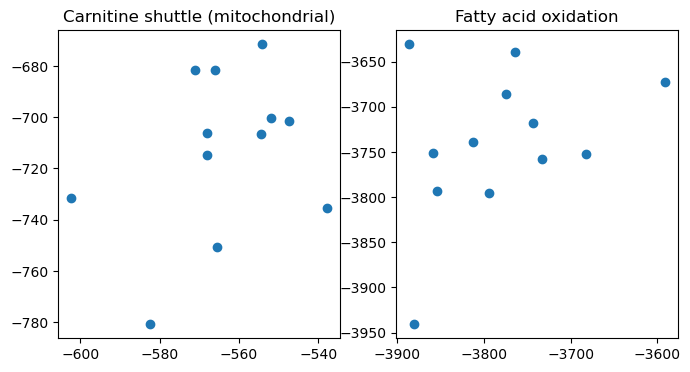

In [20]:
replicas = 120
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
for axi, subsys in zip(ax, ['Carnitine shuttle (mitochondrial)', 'Fatty acid oxidation']):
    m = fittedm.loc[subsys]
    fpath = '../../results/2023-02-10-gem-subsystems/LLs-' + subsys2fname(subsys) + '.csv'
    if os.path.exists(fpath):
        LLs = pd.read_csv(fpath)
    else:
        LLs = gem_tools.get_marginal_likelihoods(m, replicas=replicas, returnBF=False, asynchronous=True)
        LLs.to_csv(fpath, index=False)
    axi.scatter(x='M1', y='M0', data=LLs)
    axi.set_title(subsys)

In [21]:
def get_BF(loc, scale, H_0_max_fc=3):
    H_0 = [np.log(H_0_max_fc) * x for x in [-1, 1]]
    CDF_left, CDF_right = scipy.stats.norm.cdf(H_0, loc=loc, scale=scale)
    p_H_0 = (CDF_right - CDF_left)
    p_H_1 = 1 - p_H_0
    BF = p_H_1 / p_H_0
    return(BF)

def exp_transform(fe, alpha=0.005):
    fe = fe.copy()
    fe['OR'] = fe.fe_mean.apply(np.exp)
    half_CI = fe.fe_sd.apply(lambda x: scipy.stats.norm.ppf(1 - alpha, loc=0, scale=x))
    fe['Lbound'] = (fe.fe_mean - half_CI).apply(np.exp)
    fe['Ubound'] = (fe.fe_mean + half_CI).apply(np.exp)
    fe['Lhalf_CI'] = fe['OR'] - fe['Lbound']
    fe['Uhalf_CI'] = fe['Ubound'] - fe['OR']
    return(fe)

In [22]:
fe = pd.concat([fittedm.dropna().apply(lambda m: getattr(m, fe)[1]).to_frame(fe) for fe in ['fe_mean', 'fe_sd']], axis=1)
H_0_max_fc = 3
fe = pd.concat([fe, fe.apply(lambda r: get_BF(*r, H_0_max_fc=H_0_max_fc), axis=1).to_frame('BF_fc' + str(H_0_max_fc))], axis=1)
fe['2 log BF_fc3'] = fe.BF_fc3.apply(lambda x: 2 * np.log(x))
fe = exp_transform(fe)
fe = fe.sort_values('BF_fc3', ascending=False)
fe

,fe_mean,fe_sd,BF_fc3,2 log BF_fc3,OR,Lbound,Ubound,Lhalf_CI,Uhalf_CI
Carnitine shuttle (endoplasmic reticular),6.058208,0.728133,2.069047e+11,52.111048,427.608348,65.540037,2789.880927,362.068311,2362.272579
Beta oxidation of branched-chain fatty acids (mitochondrial),-2.647663,0.681926,8.553582e+01,8.897871,0.070817,0.012226,0.410189,0.058591,0.339373
Carnitine shuttle (mitochondrial),1.646018,0.267293,4.830501e+01,7.755071,5.186286,2.605219,10.324493,2.581067,5.138206
Glycosylphosphatidylinositol (GPI)-anchor biosynthesis,-1.503024,0.226318,2.604508e+01,6.519658,0.222456,0.124185,0.398492,0.098271,0.176036
Beta oxidation of odd-chain fatty acids (mitochondrial),-1.323693,0.459133,2.205274e+00,1.581703,0.266151,0.081566,0.868451,0.184585,0.602300
...,...,...,...,...,...,...,...,...,...
Xenobiotics metabolism,-0.023193,0.102749,0.000000e+00,-inf,0.977074,0.749868,1.273122,0.227206,0.296048
Nucleotide metabolism,0.069412,0.118496,0.000000e+00,-inf,1.071878,0.789928,1.454465,0.281950,0.382587
Exchange/demand reactions,0.183813,0.086291,0.000000e+00,-inf,1.201791,0.962271,1.500929,0.239519,0.299138
Fatty acid oxidation,-0.048640,0.113901,0.000000e+00,-inf,0.952524,0.710327,1.277302,0.242197,0.324778


### Volcano Plots

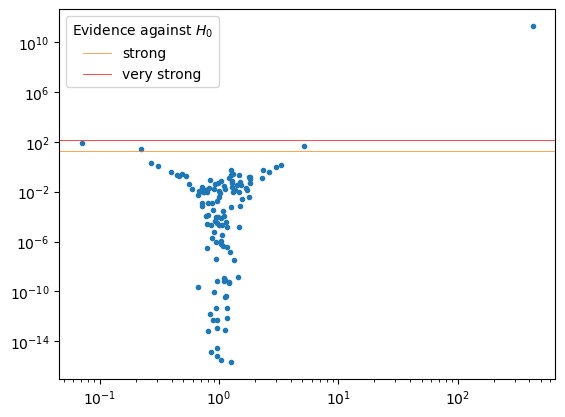

In [23]:
fig, ax = plt.subplots()
ax.scatter(x='OR', y='BF_fc3', data=fe, marker='.', label=None)
ax.set_xscale('log')
ax.set_yscale('log')
linewidth = 0.5
linestyle = 'solid'
for BFthrs, label, color in zip([20, 150], ['strong', 'very strong'], ['C1', 'red']):
    ax.axhline(BFthrs, linewidth=linewidth, linestyle=linestyle, color=color, label=label)
# TODO: label top scoring subsystems with letters, indicate them also in the legend
ax.legend(title=r'Evidence against $H_0$')

### Credible intervals

In [24]:
fe_shortened = pd.concat([fe.head(15), pd.DataFrame({'fe_mean': [np.nan], 'fe_sd': [np.nan]}, index=['...']), fe.tail(15)])
exp_transform(fe_shortened)

,fe_mean,fe_sd,BF_fc3,2 log BF_fc3,OR,Lbound,Ubound,Lhalf_CI,Uhalf_CI
Carnitine shuttle (endoplasmic reticular),6.058208,0.728133,2.069047e+11,52.111048,427.608348,65.540037,2789.880927,362.068311,2362.272579
Beta oxidation of branched-chain fatty acids (mitochondrial),-2.647663,0.681926,8.553582e+01,8.897871,0.070817,0.012226,0.410189,0.058591,0.339373
Carnitine shuttle (mitochondrial),1.646018,0.267293,4.830501e+01,7.755071,5.186286,2.605219,10.324493,2.581067,5.138206
Glycosylphosphatidylinositol (GPI)-anchor biosynthesis,-1.503024,0.226318,2.604508e+01,6.519658,0.222456,0.124185,0.398492,0.098271,0.176036
Beta oxidation of odd-chain fatty acids (mitochondrial),-1.323693,0.459133,2.205274e+00,1.581703,0.266151,0.081566,0.868451,0.184585,0.602300
Carnitine shuttle (cytosolic),1.193071,0.444022,1.405194e+00,0.680350,3.297192,1.050584,10.348028,2.246608,7.050837
Heme synthesis;Porphyrin metabolism,-1.180292,0.543679,1.271305e+00,0.480088,0.307189,0.075720,1.246241,0.231469,0.939052
Beta oxidation of di-unsaturated fatty acids (n-6) (peroxisomal),1.098072,0.463555,9.981463e-01,-0.003711,2.998380,0.908494,9.895810,2.089886,6.897430
Beta oxidation of odd-chain fatty acids (peroxisomal),0.236763,1.177709,5.638888e-01,-1.145796,1.267140,0.061004,26.320310,1.206136,25.053170
Fatty acid biosynthesis (even-chain),0.854762,0.630492,5.395037e-01,-1.234211,2.350816,0.463348,11.926962,1.887468,9.576146


['named-figure/posterior-OR-top-bottom-subsystems.png',
 'named-figure/posterior-OR-top-bottom-subsystems.pdf']

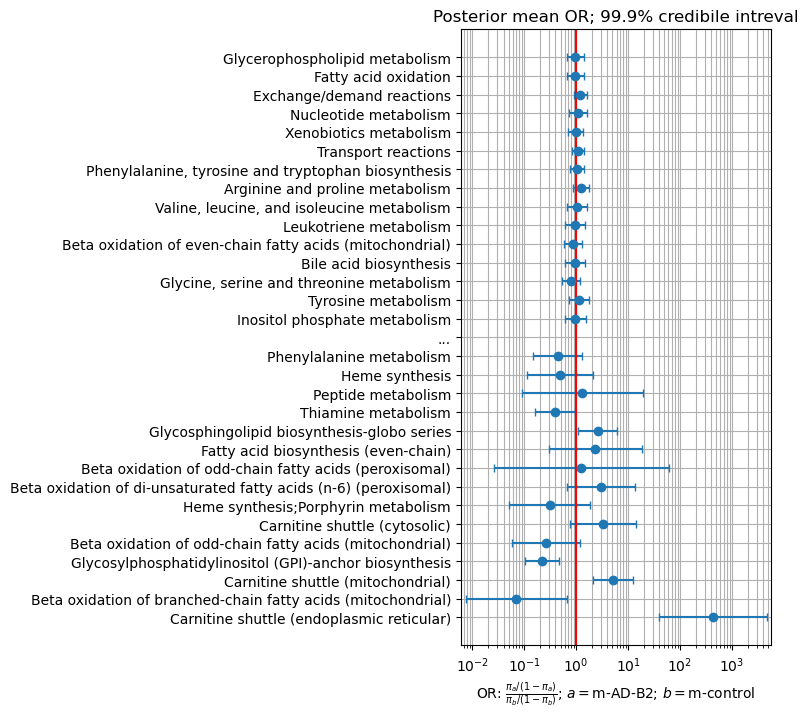

In [25]:
def credibility_plot(fe, alpha=0.0005, control_group='m-control', AD_group='m-AD-B2'):
    fe = exp_transform(fe, alpha=alpha)
    fig, ax = plt.subplots(figsize=(4, 8))
    ax.errorbar(x=fe.OR, y=list(range(fe.shape[0])), xerr=(fe.Lhalf_CI, fe.Uhalf_CI), linestyle='none', marker='o', capsize=3)
    ax.set_xscale('log')
    ax.set_xlim([0.8 * fe.Lbound.min(), 1.2 * fe.Ubound.max()])
    ax.set_yticks(list(range(fe.shape[0])))
    ax.set_yticklabels(fe.index)
    ax.grid(which='both')
    ax.axvline(1, color='red')
    ax.set_title(r'Posterior mean OR; ' + str(100 * (1 - 2 * alpha)) + '% credibile intreval')
    ax.set_xlabel(r'OR: $\frac{\pi_a / (1 - \pi_a)}{\pi_b / (1 - \pi_b)}$; $a =$' + AD_group + r'; $b =$' + control_group)
    return((fig, ax))

fig, ax = credibility_plot(fe_shortened)
attila_utils.savefig(fig, 'posterior-OR-top-bottom-subsystems')

## Illustrations

### Prior and posterior estimates and credible regions

['named-figure/CI-prior-posterior_Carnitine-shuttle-mitochondrial.png',
 'named-figure/CI-prior-posterior_Carnitine-shuttle-mitochondrial.pdf']

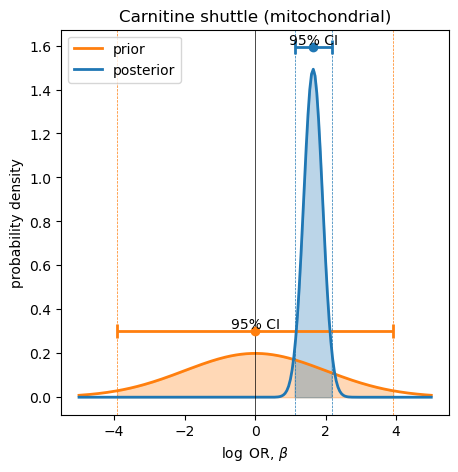

In [26]:
def CI_plot(ax, loc=0, scale=2, alpha=0.025, support=5, label=None, color='C0', CI_mode_off=None):
    n = 201
    x = np.linspace(-support, support, n)
    y = scipy.stats.norm.pdf(x, loc, scale)
    CI_halfwidth = scipy.stats.norm.ppf(1 - alpha, loc=0, scale=scale)
    CI = [loc - CI_halfwidth, loc + CI_halfwidth]
    linewidth = 2
    ax.plot(x, y, label=label, color=color, linewidth=linewidth)
    # credibility interval
    x_CI = np.linspace(*CI, n)
    # CI: fill under PDF
    ax.fill_between(x_CI, 0, scipy.stats.norm.pdf(x_CI, loc, scale), alpha=0.3, color=color)
    # CI: vertical lines
    vlinestyle = 'dashed'
    vlinewidth = 0.5
    ax.axvline(CI[0], linestyle=vlinestyle, linewidth=vlinewidth, color=color)
    ax.axvline(CI[1], linestyle=vlinestyle, linewidth=vlinewidth, color=color)
    # CI: error bar showing CI
    mode = scipy.stats.norm.pdf(loc, loc, scale)
    CI_y = mode + (CI_mode_off if CI_mode_off is not None else 0.1 * mode)
    ax.errorbar(x=loc, y=CI_y, xerr=CI_halfwidth, linewidth=linewidth, capthick=linewidth, marker='o', capsize=5, color=color)
    ax.text(x=loc, y=CI_y, s=str(int(100 * (1 - 2 * alpha))) + '% CI', verticalalignment='bottom', horizontalalignment='center')
    ax.set_xlabel(r'$\log$ OR, $\beta$')
    ax.set_ylabel('probability density')
    return(ax)

fig, ax = plt.subplots(figsize=(5,5))
CI_mode_off = 0.1
ax = CI_plot(ax, CI_mode_off=CI_mode_off, label='prior', color='C1')
subsys = 'Carnitine shuttle (mitochondrial)'
ax = CI_plot(ax, *fe.loc[subsys, ['fe_mean', 'fe_sd']], color='C0', CI_mode_off=CI_mode_off, label='posterior')
ax.axvline(0, color='black', linewidth=0.5)
ax.legend()
ax.set_title(subsys)
attila_utils.savefig(fig, 'CI-prior-posterior_Carnitine-shuttle-mitochondrial')

### Bayes factors

The default $H_0$ is $\log_2 \mathrm{OR} \in [-1, 1]$: at most $2\times$ change in the odds of active:inactive state in AD (subtype) relative to control.

['named-figure/Bayes-factor-posterior_Carnitine-shuttle-mitochondrial.png',
 'named-figure/Bayes-factor-posterior_Carnitine-shuttle-mitochondrial.pdf']

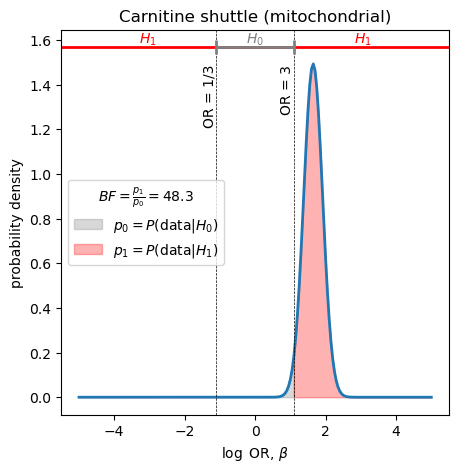

In [27]:
# The default H_0 is OR in [1 / H_0_max_fc_default, H_0_max_fc_default]: at most H_0_max_fc_default-fold change in the odds of active:inactive state
H_0_max_fc_default = 3

def BF_plot(ax, loc=0, scale=2, H_0_max_fc=H_0_max_fc_default, support=5, color='C0'):
    H_0 = [np.log(H_0_max_fc) * x for x in [-1, 1]]
    n = 201
    x = np.linspace(-support, support, n)
    y = scipy.stats.norm.pdf(x, loc, scale)
    linewidth = 2
    ax.plot(x, y, color=color, linewidth=linewidth)
    # Null hypothesis
    x_H_0 = np.linspace(*H_0, n)
    ax.fill_between(x_H_0, 0, scipy.stats.norm.pdf(x_H_0, loc, scale), alpha=0.3, color='gray', label=r'$p_0 = P(\mathrm{data} | H_0)$')
    x_H_1_left = np.linspace(-support, H_0[0], n)
    ax.fill_between(x_H_1_left, 0, scipy.stats.norm.pdf(x_H_1_left, loc, scale), alpha=0.3, color='red', label=r'$p_1 = P(\mathrm{data} | H_1)$')
    x_H_1_right = np.linspace(H_0[1], support, n)
    ax.fill_between(x_H_1_right, 0, scipy.stats.norm.pdf(x_H_1_right, loc, scale), alpha=0.3, color='red')
    # H_0 boundaries: vertical lines
    vlinestyle = 'dashed'
    vlinewidth = 0.5
    ax.axvline(H_0[0], linestyle=vlinestyle, linewidth=vlinewidth, color='black')
    ax.axvline(H_0[1], linestyle=vlinestyle, linewidth=vlinewidth, color='black')
    # H_1 area
    mode = scipy.stats.norm.pdf(loc, loc, scale)
    ax.axhline(1.05 * mode, color='red', linewidth=linewidth)
    ax.text(x=(-support + H_0[0]) / 2, y=1.05 * mode, s=r'$H_1$', color='red', verticalalignment='bottom', horizontalalignment='center')
    ax.text(x=(+support - H_0[0]) / 2, y=1.05 * mode, s=r'$H_1$', color='red', verticalalignment='bottom', horizontalalignment='center')
    # H_0 area
    ax.errorbar(x=0, y=1.05 * mode, xerr=H_0[1], linewidth=linewidth, capthick=linewidth, capsize=5, color='gray')
    ax.text(x=0, y=1.05 * mode, s=r'$H_0$', color='gray', verticalalignment='bottom', horizontalalignment='center')
    ax.text(x=H_0[0], y=mode, s='OR = 1/{}'.format(H_0_max_fc), rotation=90, verticalalignment='top', horizontalalignment='right')
    ax.text(x=H_0[1], y=mode, s='OR = {}'.format(H_0_max_fc), rotation=90, verticalalignment='top', horizontalalignment='right')
    # Bayes factor
    CDF_left, CDF_right = scipy.stats.norm.cdf(H_0, loc=loc, scale=scale)
    p_H_0 = (CDF_right - CDF_left)
    p_H_1 = 1 - p_H_0
    BF = p_H_1 / p_H_0
    ax.legend(title=r'$BF = \frac{p_1}{p_0} = $' + '{:.1f}'.format(BF))
    ax.set_title(r'Testing $H_1$: at least {}-fold change of odds'.format(H_0_max_fc_default))
    ax.set_xlabel(r'$\log$ OR, $\beta$')
    ax.set_ylabel('probability density')
    return((ax, BF))

fig, ax = plt.subplots(figsize=(5,5))
CI_mode_off = 0.1
subsys = 'Carnitine shuttle (mitochondrial)'
ax, BF = BF_plot(ax, *fe.loc[subsys, ['fe_mean', 'fe_sd']], color='C0')
ax.set_title(subsys)
attila_utils.savefig(fig, 'Bayes-factor-posterior_Carnitine-shuttle-mitochondrial')

In [28]:
%connect_info

{
  "shell_port": 51077,
  "iopub_port": 51078,
  "stdin_port": 51079,
  "control_port": 51081,
  "hb_port": 51080,
  "ip": "127.0.0.1",
  "key": "9c1bbd4d-b5bf6cfe4de019b874225389",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-4ef61b48-0391-4714-af8f-e7a89d84c48e.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
